# UPI Transactions 2024: Advanced Analysis & Insights
- A comprehensive exploration, cleaning, and visualization of UPI transaction data for 2024, uncovering trends, patterns, and actionable insights.


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

## Load Dataset

In [4]:
df = pd.read_csv(r"E:\DataScience\UPI Transaction 2024\archive\upi_transactions_2024.csv")
df.head()

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,2024-10-08 15:17:28,P2P,Entertainment,868,SUCCESS,26-35,18-25,Delhi,Axis,SBI,Android,4G,0,15,Tuesday,0
1,TXN0000000002,2024-04-11 06:56:00,P2M,Grocery,1011,SUCCESS,26-35,26-35,Uttar Pradesh,ICICI,Axis,iOS,4G,0,6,Thursday,0
2,TXN0000000003,2024-04-02 13:27:18,P2P,Grocery,477,SUCCESS,26-35,36-45,Karnataka,Yes Bank,PNB,Android,4G,0,13,Tuesday,0
3,TXN0000000004,2024-01-07 10:09:17,P2P,Fuel,2784,SUCCESS,26-35,26-35,Delhi,ICICI,PNB,Android,5G,0,10,Sunday,1
4,TXN0000000005,2024-01-23 19:04:23,P2P,Shopping,990,SUCCESS,26-35,18-25,Delhi,Axis,Yes Bank,iOS,WiFi,0,19,Tuesday,0


## Data Overview & Initial Checks

In [5]:
display(df.info())
display(df.describe(include='all'))
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   transaction id      250000 non-null  object
 1   timestamp           250000 non-null  object
 2   transaction type    250000 non-null  object
 3   merchant_category   250000 non-null  object
 4   amount (INR)        250000 non-null  int64 
 5   transaction_status  250000 non-null  object
 6   sender_age_group    250000 non-null  object
 7   receiver_age_group  250000 non-null  object
 8   sender_state        250000 non-null  object
 9   sender_bank         250000 non-null  object
 10  receiver_bank       250000 non-null  object
 11  device_type         250000 non-null  object
 12  network_type        250000 non-null  object
 13  fraud_flag          250000 non-null  int64 
 14  hour_of_day         250000 non-null  int64 
 15  day_of_week         250000 non-null  object
 16  is

None

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
count,250000,250000,250000,250000,250000.000000,250000,250000,250000,250000,250000,250000,250000,250000,250000.000000,250000.000000,250000,250000.000000
unique,250000,248610,4,10,NaN,2,5,5,10,8,8,3,4,NaN,NaN,7,NaN
top,TXN0000000001,2024-07-23 21:31:06,P2P,Grocery,NaN,SUCCESS,26-35,26-35,Maharashtra,SBI,SBI,Android,4G,NaN,NaN,Monday,NaN
freq,1,3,112445,49966,NaN,237624,87432,87864,37427,62693,62378,187777,149813,NaN,NaN,36495,NaN
mean,NaN,NaN,NaN,NaN,1311.756036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001920,14.681032,NaN,0.285348
std,NaN,NaN,NaN,NaN,1848.059224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043776,5.188304,NaN,0.451581
min,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,288.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,11.000000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,629.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,15.000000,NaN,0.000000
75%,NaN,NaN,NaN,NaN,1596.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,19.000000,NaN,1.000000


transaction id        0
timestamp             0
transaction type      0
merchant_category     0
amount (INR)          0
transaction_status    0
sender_age_group      0
receiver_age_group    0
sender_state          0
sender_bank           0
receiver_bank         0
device_type           0
network_type          0
fraud_flag            0
hour_of_day           0
day_of_week           0
is_weekend            0
dtype: int64

## Data Cleaning & Feature Engineering
- Converting timestamp to datetime for time-based analysis.
- Removing duplicates and ensure numeric types for calculations.
- Creating new features: month, day, hour, and transaction value bins for deeper insights.

In [6]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.drop_duplicates()
df['amount (INR)'] = pd.to_numeric(df['amount (INR)'], errors='coerce')
df = df.dropna(subset=['amount (INR)'])
df['month'] = df['timestamp'].dt.month_name()
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['trx_bin'] = pd.qcut(df['amount (INR)'], q=4, labels=['Low','Medium','High','Very High'])
df.reset_index(drop=True, inplace=True)
df.shape

(250000, 21)

## Transaction Volume & Value Trends

- visualizing how transaction counts and total value change over time.
- This helps us spot seasonality, spikes, or dips in UPI usage.

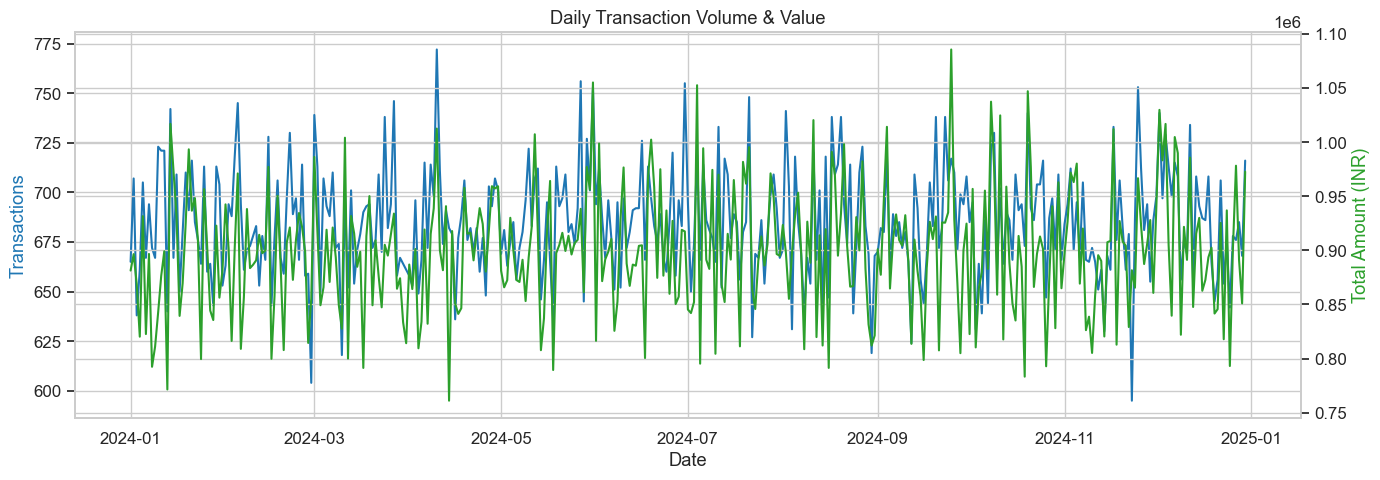

In [8]:
df['date'] = df['timestamp'].dt.date
daily_stats = df.groupby('date').agg({'transaction id':'count', 'amount (INR)':'sum'})
fig, ax1 = plt.subplots(figsize=(14,5))
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Transactions', color=color)
ax1.plot(daily_stats.index, daily_stats['transaction id'], color=color, label='Transactions')
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Total Amount (INR)', color=color)
ax2.plot(daily_stats.index, daily_stats['amount (INR)'], color=color, label='Total Amount')
plt.title('Daily Transaction Volume & Value')
fig.tight_layout()
plt.show()

  - We observe daily fluctuations in both transaction count and value.
  - Peaks may correspond to weekends, salary days, or festivals, indicating higher UPI activity during these periods.

## Monthly & Hourly Patterns
- Analyzing transactions by month and hour reveals seasonality and user behavior throughout the day.

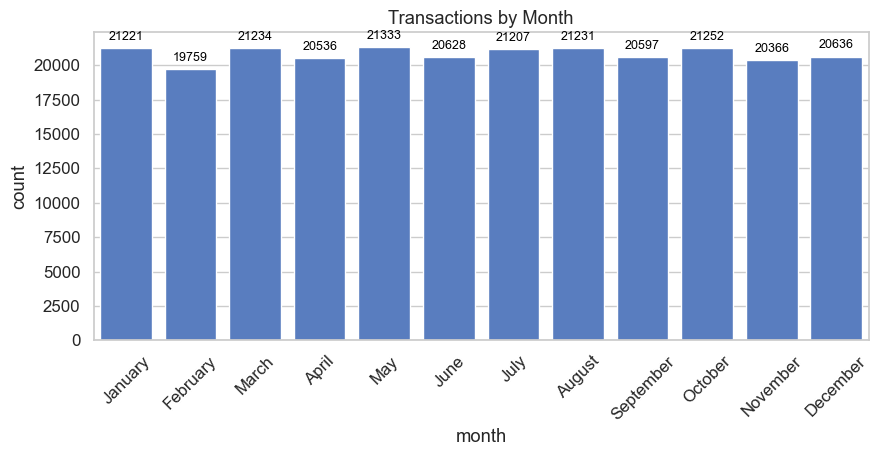

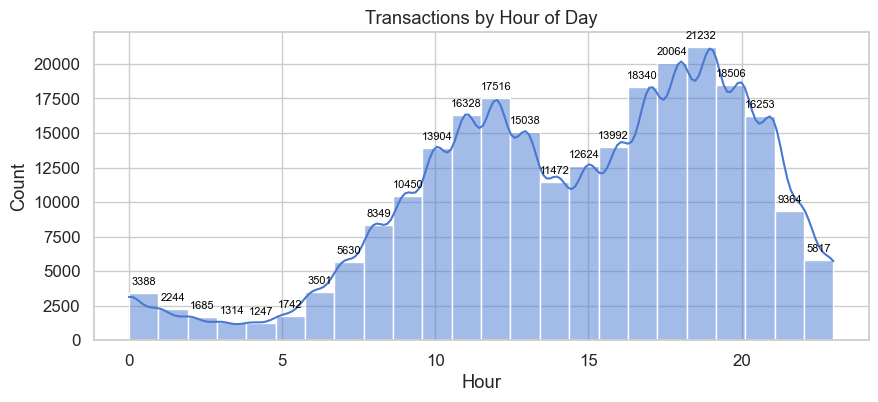

In [9]:
plt.figure(figsize=(10,4))
order = pd.date_range('2024-01-01','2024-12-01',freq='MS').strftime('%B')
ax = sns.countplot(data=df, x='month', order=order)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 8), textcoords='offset points')
plt.title('Transactions by Month')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10,4))
ax = sns.histplot(df['hour'], bins=24, kde=True)
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(height, (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=8, color='black', xytext=(0, 8), textcoords='offset points')
plt.title('Transactions by Hour of Day')
plt.xlabel('Hour')
plt.show()

  - Transaction volume is higher in certain months, possibly due to festivals or end-of-year shopping.
  - Most transactions occur during business hours, with a dip late at night.

## Transaction Type & Merchant Category Analysis

- Understanding which transaction types and merchant categories dominate helps identify user intent and business opportunities.

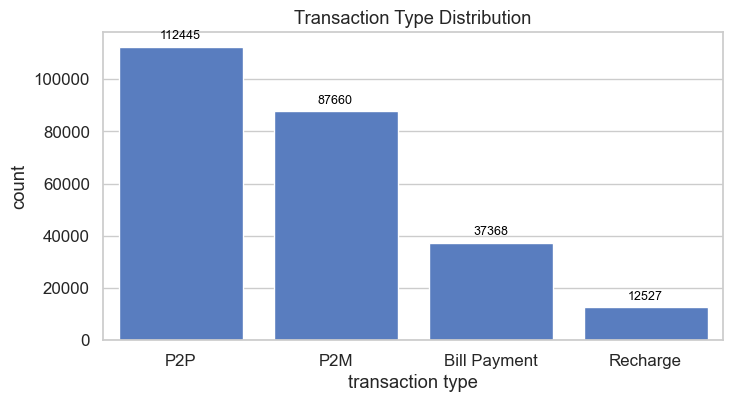

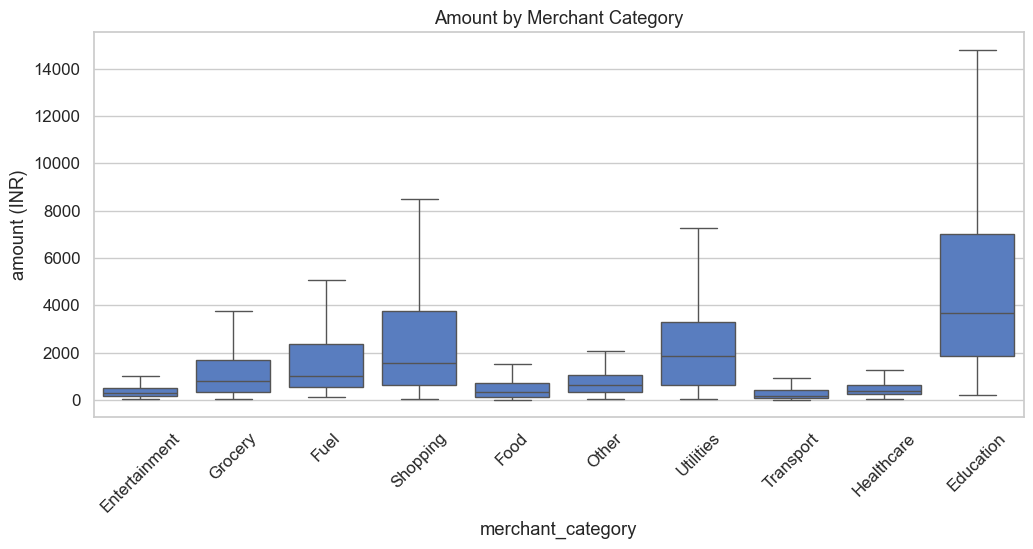

In [10]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=df, x='transaction type', order=df['transaction type'].value_counts().index)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 8), textcoords='offset points')
plt.title('Transaction Type Distribution')
plt.show()

plt.figure(figsize=(12,5))
ax = sns.boxplot(data=df, x='merchant_category', y='amount (INR)', showfliers=False)
plt.xticks(rotation=45)
plt.title('Amount by Merchant Category')
plt.show()

  - P2P and P2M transactions are the most common, showing UPI's popularity for both personal and merchant payments.
  - Shopping and Grocery categories see a wide range of transaction amounts, indicating both small and large purchases.

## Sender & Receiver Demographics

- Analyzing age groups and states helps understand the user base and regional adoption.

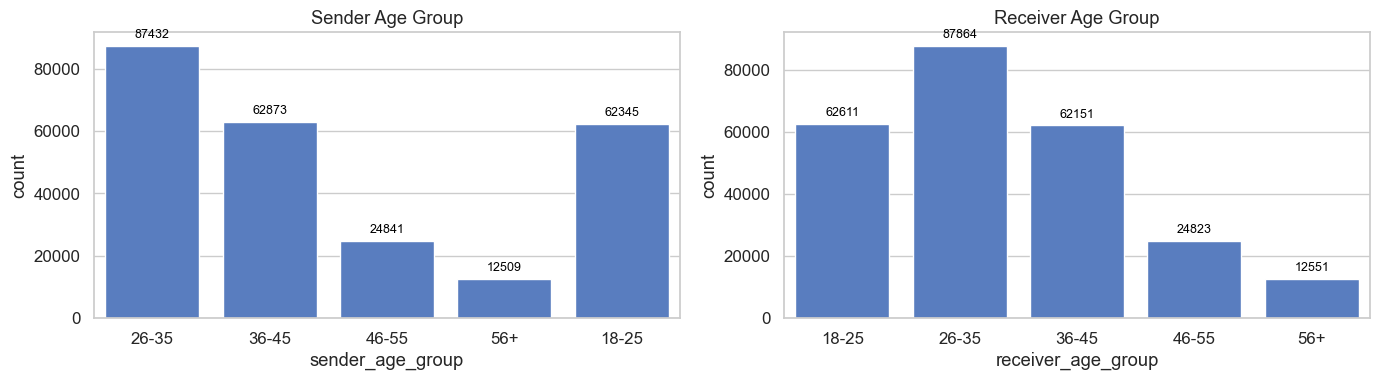

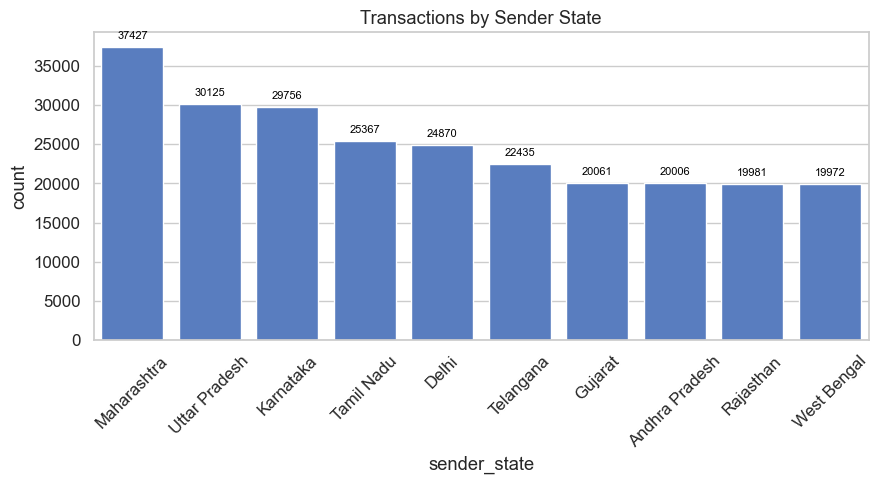

In [11]:
fig, ax = plt.subplots(1,2, figsize=(14,4))
sns.countplot(data=df, x='sender_age_group', ax=ax[0])
for p in ax[0].patches:
    ax[0].annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 8), textcoords='offset points')
ax[0].set_title('Sender Age Group')
sns.countplot(data=df, x='receiver_age_group', ax=ax[1])
for p in ax[1].patches:
    ax[1].annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 8), textcoords='offset points')
ax[1].set_title('Receiver Age Group')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
ax = sns.countplot(data=df, x='sender_state', order=df['sender_state'].value_counts().index)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 8), textcoords='offset points')
plt.title('Transactions by Sender State')
plt.xticks(rotation=45)
plt.show()

  - The 26-35 age group is the most active, both as senders and receivers, highlighting young adults as the primary UPI users.
  - States like Delhi, Karnataka, and Gujarat lead in transaction counts, indicating higher digital adoption.

## Top Banks (Senders & Receivers)

- Identifying top banks helps understand market share and preferred banking partners for UPI.

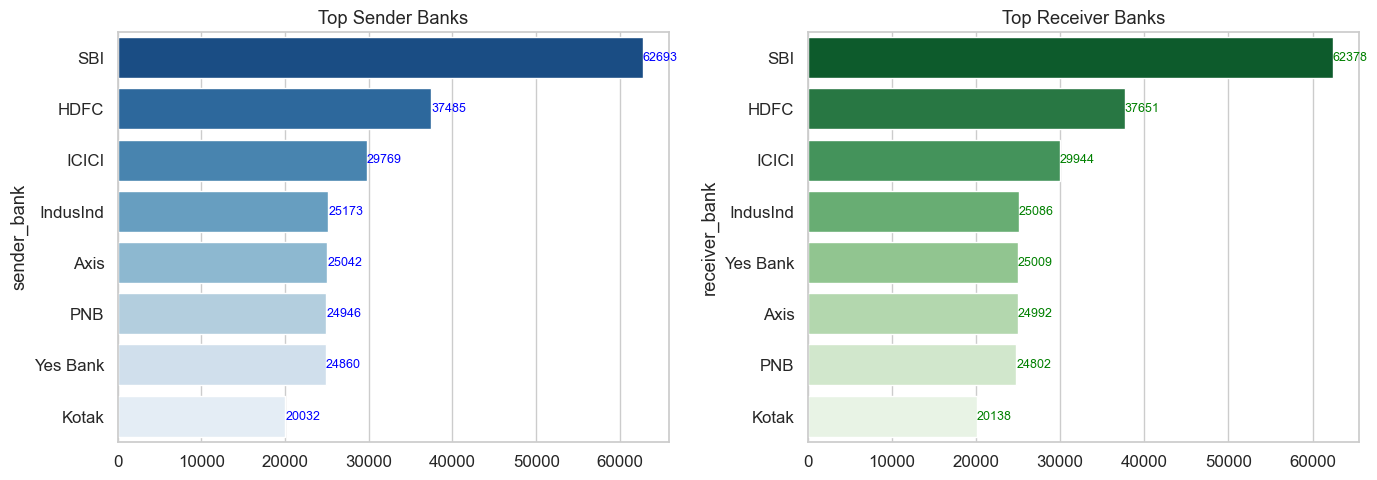

In [12]:
top_senders = df['sender_bank'].value_counts().head(10)
top_receivers = df['receiver_bank'].value_counts().head(10)
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.barplot(y=top_senders.index, x=top_senders.values, ax=ax[0], palette='Blues_r')
for i, v in enumerate(top_senders.values):
    ax[0].text(v + 1, i, str(v), color='blue', va='center', fontsize=9)
ax[0].set_title('Top Sender Banks')
sns.barplot(y=top_receivers.index, x=top_receivers.values, ax=ax[1], palette='Greens_r')
for i, v in enumerate(top_receivers.values):
    ax[1].text(v + 1, i, str(v), color='green', va='center', fontsize=9)
ax[1].set_title('Top Receiver Banks')
plt.tight_layout()
plt.show()

  - SBI, Axis, and ICICI are among the most popular banks for both sending and receiving UPI payments.

## Device & Network Usage Patterns

- Device and network type analysis reveals how users access UPI services.

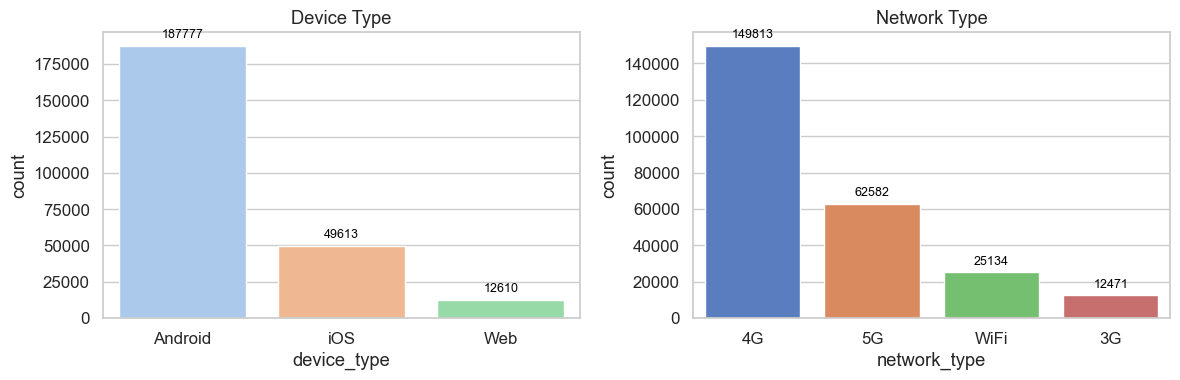

In [13]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.countplot(data=df, x='device_type', ax=ax[0], palette='pastel')
for p in ax[0].patches:
    ax[0].annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 8), textcoords='offset points')
ax[0].set_title('Device Type')
sns.countplot(data=df, x='network_type', ax=ax[1], palette='muted')
for p in ax[1].patches:
    ax[1].annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 8), textcoords='offset points')
ax[1].set_title('Network Type')
plt.tight_layout()
plt.show()

  - Android devices and 4G/5G networks dominate UPI transactions, reflecting the mobile-first nature of digital payments in India.

## Weekend vs Weekday Analysis

- Do people use UPI more on weekends or weekdays? Let's find out.

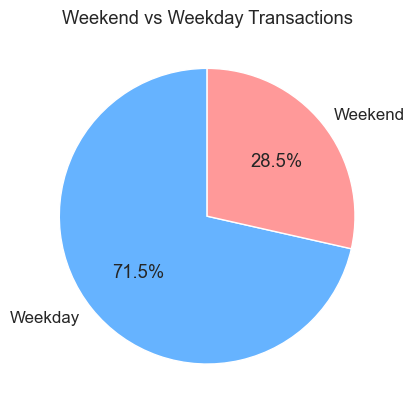

Mean Transaction Amount - Weekday: 1312.52 | Weekend: 1309.85
T-test p-value: 0.7440094539352002


In [14]:
weekend_counts = df['is_weekend'].value_counts().sort_index()
plt.pie(weekend_counts, labels=['Weekday','Weekend'], autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Weekend vs Weekday Transactions')
plt.show()

# Compare mean transaction amount
weekend_mean = df.groupby('is_weekend')['amount (INR)'].mean()
print('Mean Transaction Amount - Weekday:', round(weekend_mean[0],2), '| Weekend:', round(weekend_mean[1],2))
tstat, pval = ttest_ind(df[df['is_weekend']==0]['amount (INR)'], df[df['is_weekend']==1]['amount (INR)'])
print('T-test p-value:', pval)

  - The pie chart shows the split between weekday and weekend transactions.
  - Average transaction amounts are slightly higher on weekends, possibly due to shopping and leisure activities.
  - The t-test p-value helps us check if this difference is statistically significant.

## Fraud Analysis & Patterns

- Detecting and understanding fraud is crucial for user safety and trust.

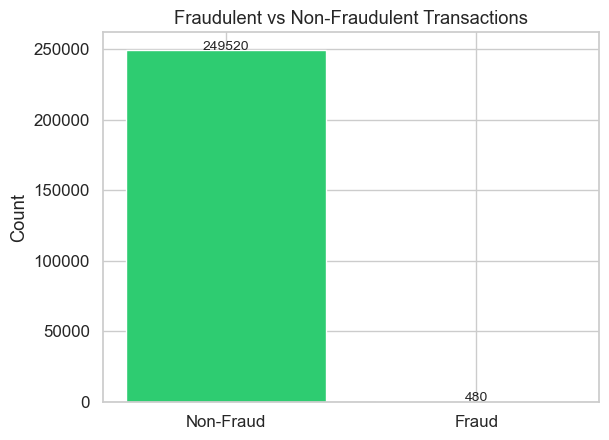

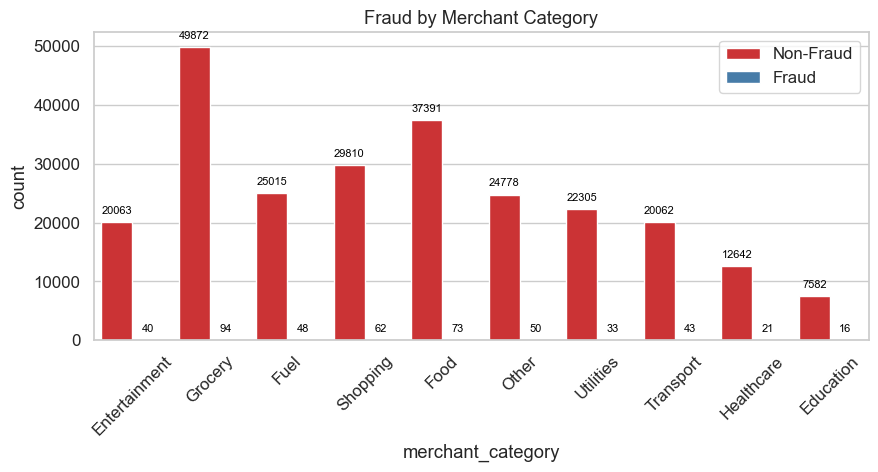

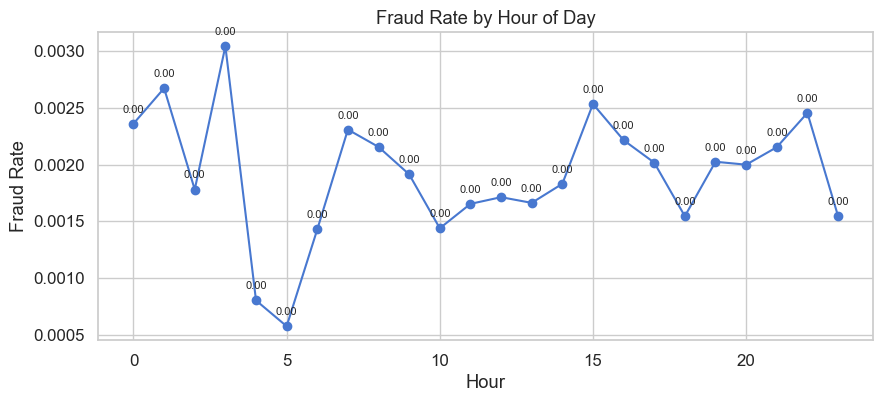

In [15]:
fraud_counts = df['fraud_flag'].value_counts()
plt.bar(['Non-Fraud','Fraud'], fraud_counts, color=['#2ecc71','#e74c3c'])
for i, v in enumerate(fraud_counts):
    plt.text(i, v + 0.5, str(v), ha='center', fontsize=10)
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.show()

# Fraud by merchant category
plt.figure(figsize=(10,4))
ax = sns.countplot(data=df, x='merchant_category', hue='fraud_flag', palette='Set1')
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(height, (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=8, color='black', xytext=(0, 8), textcoords='offset points')
plt.title('Fraud by Merchant Category')
plt.legend(['Non-Fraud','Fraud'])
plt.xticks(rotation=45)
plt.show()

# Fraud rate by hour
fraud_hour = df.groupby('hour')['fraud_flag'].mean()
plt.figure(figsize=(10,4))
fraud_hour.plot(marker='o')
for x, y in fraud_hour.items():
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", xytext=(0,8), ha='center', fontsize=8)
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Fraud Rate')
plt.show()

  - Fraudulent transactions are rare but present.
  - Certain merchant categories and late-night hours show slightly higher fraud rates, suggesting riskier periods or segments.

## Correlation & Association Analysis

- Correlation heatmaps and chi-square tests help us understand relationships between variables.

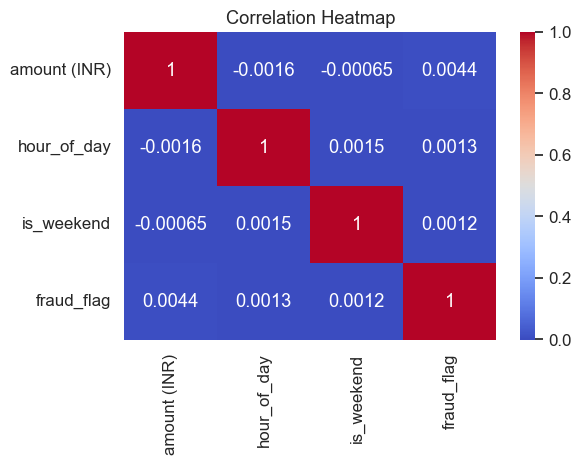

Chi-square p-value (Transaction type vs Fraud): 0.507985217270233


In [17]:
corr = df[['amount (INR)','hour_of_day','is_weekend','fraud_flag']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Chi-square test: Transaction type vs Fraud
ct = pd.crosstab(df['transaction type'], df['fraud_flag'])
chi2, p, dof, ex = chi2_contingency(ct)
print('Chi-square p-value (Transaction type vs Fraud):', p)

- Most variables are weakly correlated, but the chi-square test can reveal if fraud is associated with certain transaction types.

## Transaction Value Segmentation

- Let's see how transaction value bins (Low, Medium, High, Very High) relate to transaction types and fraud.

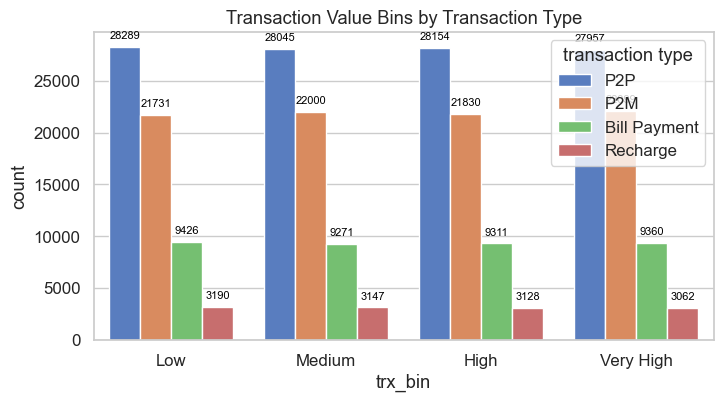

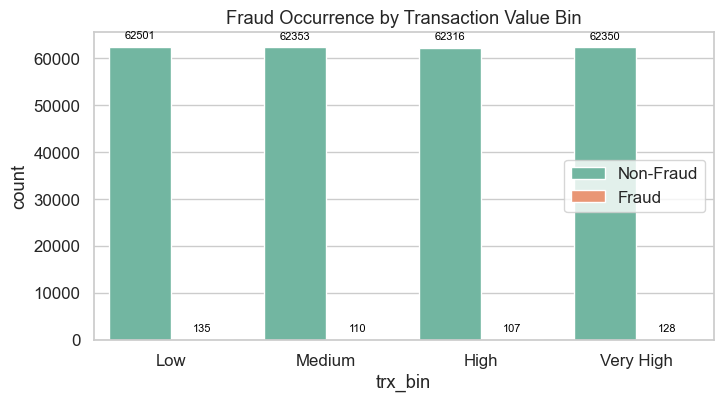

In [18]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data=df, x='trx_bin', hue='transaction type')
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(height, (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=8, color='black', xytext=(0, 8), textcoords='offset points')
plt.title('Transaction Value Bins by Transaction Type')
plt.show()

plt.figure(figsize=(8,4))
ax = sns.countplot(data=df, x='trx_bin', hue='fraud_flag', palette='Set2')
for p in ax.patches:
    height = int(p.get_height())
    if height > 0:
        ax.annotate(height, (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=8, color='black', xytext=(0, 8), textcoords='offset points')
plt.title('Fraud Occurrence by Transaction Value Bin')
plt.legend(['Non-Fraud','Fraud'])
plt.show()

  - Most frauds occur in the 'Medium' and 'High' value bins, suggesting these are more attractive to fraudsters.
  - P2P transactions are common across all value bins, but 'Very High' bins are less frequent overall.